In [65]:
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import(pairwise_tukeyhsd, MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
sns.set(style = 'dark', rc = {'figure.figsize' : (5, 5)})

In [5]:
picture = pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_1.csv')

In [6]:
picture.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [15]:
#gomogensity of variences
stats.levene(picture[picture.group == 'A'].events, picture[picture.group == 'B'].events, picture[picture.group == 'C'].events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

<AxesSubplot:>

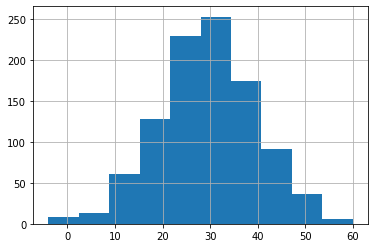

In [17]:
#Shapiro_Wilki for normality
picture[picture.group == 'A'].events.sample(1000, random_state=17).hist()

<AxesSubplot:>

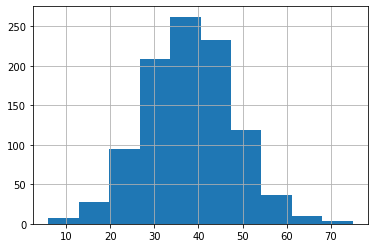

In [18]:
picture[picture.group == 'B'].events.sample(1000, random_state=17).hist()

<AxesSubplot:>

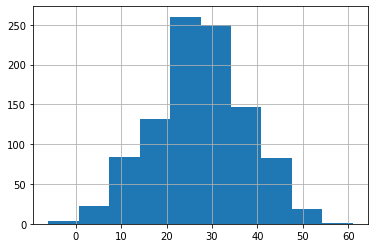

In [19]:
picture[picture.group == 'C'].events.sample(1000, random_state=17).hist()

In [21]:
# one factor ANOVA
stats.f_oneway(picture[picture.group == 'A'].events, picture[picture.group == 'B'].events, picture[picture.group == 'C'].events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [24]:
#tukey test, we are looking at meandiff(more - better) group2 - group1
print(pairwise_tukeyhsd(picture.events, picture.group ))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [25]:
button = pd.read_csv('/Users/tsyrdugar/Downloads/button.csv')

In [69]:
button.head(10)

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
5,49481,test,high,81.0,test \ high
6,95408,test,high,57.0,test \ high
7,7582,test,high,67.0,test \ high
8,32404,test,high,73.0,test \ high
9,12624,test,high,76.0,test \ high


<AxesSubplot:>

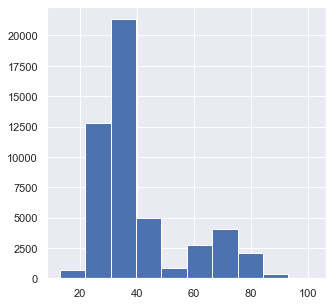

In [66]:
button[button.group == 'test'].events.hist()

<AxesSubplot:>

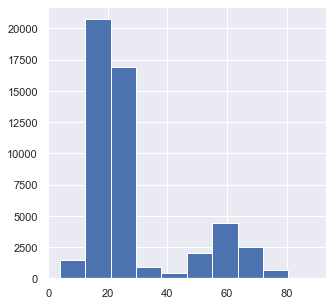

In [67]:
button[button.group == 'control'].events.hist()

In [34]:
button.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [46]:
button = button.assign(combination = button.group + ' \ ' + button.segment)

In [47]:
button.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [38]:
formula = 'events ~ group + segment + group:segment'

In [42]:
model = ols(formula, data=button).fit()

In [44]:
anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group:segment,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [50]:
print(pairwise_tukeyhsd(button.events, button.combination))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


<AxesSubplot:xlabel='group', ylabel='events'>

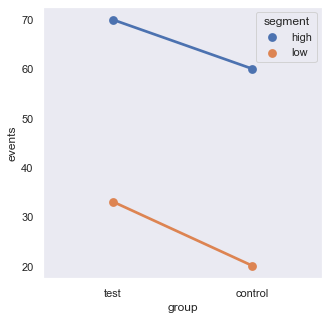

In [68]:
sns.pointplot(x='group', y='events', hue='segment', data=button)